# Mercari Price Suggestion Challenge

In [1]:
import numpy as np
import pandas as pd

MissingGNO is a library made by ResidentMario to facilitate the location of missing values in columns by using graphs and charts. The bigger the data the better to use this library. https://github.com/ResidentMario/missingno

In [5]:
import missingno as msno

In the read_csv parameters, the parsing engine is set by default to C because it is faster but not very reliable to very messy data. In this case, people my face errors while parsing through a data file. Setting the engine to python enhances the parsing efficiency but at lower speeds.

In [6]:
test = pd.read_csv('C:\\Users\\Vinicius\\Mercari_Data\\test.tsv', delimiter = '\t', engine = 'python')

In [7]:
train = pd.read_csv('C:\\Users\\Vinicius\\Mercari_Data\\train.tsv', delimiter = '\t')

In [8]:
train.shape, test.shape

((593376, 8), (693359, 7))

In [11]:
train.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


In [12]:
test.head(5)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


### Finding the headers and data type of each column

It is always good practice to have a separate list of headers from the database.

In [13]:
train_headers = train.columns.tolist()
train_headers

['train_id',
 'name',
 'item_condition_id',
 'category_name',
 'brand_name',
 'price',
 'shipping',
 'item_description']

In [14]:
# Notice there is no price header in the test data. It is because the model
# will forecast the test prices by training the model with the prices from the train data.
test_headers = test.columns.tolist()
test_headers

['test_id',
 'name',
 'item_condition_id',
 'category_name',
 'brand_name',
 'shipping',
 'item_description']

Checking the type of each column in the database

In [17]:
train_dtype = train.dtypes
train_dtype

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [18]:
test_dtype = test.dtypes
test_dtype

test_id               int64
name                 object
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
item_description     object
dtype: object

In [19]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [20]:
test.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

Checking how many types in each database

In [21]:
train_typecount = pd.value_counts(train_dtype)
train_typecount

object     4
int64      3
float64    1
dtype: int64

In [22]:
test_typecount = pd.value_counts(test_dtype)
test_typecount

object    4
int64     3
dtype: int64

### Lookinf for missing values

Checking for missing values in the train and test dataset. This check for null values in the entire dataset.

In [24]:
# If it is True, there is missing values. if False, there are no missing values
train.isnull().values.any(), test.isnull().values.any()

(True, True)

Finding the columns with missing values in the train and test dataset.

In [25]:
train_miss_val_check = train.isnull().any()
train_miss_val_check

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [26]:
# Saving the columns with missing values in a list
miss_train_col_val = train.columns[train_miss_val_check].tolist()
miss_train_col_val

['category_name', 'brand_name', 'item_description']

In [29]:
test_miss_val_check = test.isnull().any()
test_miss_val_check

test_id              False
name                 False
item_condition_id    False
category_name         True
brand_name            True
shipping             False
item_description     False
dtype: bool

In [30]:
miss_test_col_val = test.columns[test.isnull().any()].tolist()
miss_test_col_val

['category_name', 'brand_name']

This is a forcefull merge which I do not recomend using unless you know the column with the largest number of rows with values. If you do, then make sure to create the first DataFrame column with the largest-number-row column.

In [31]:
miss_val_df = pd.DataFrame(miss_train_col_val)
miss_val_df = miss_val_df.rename(columns = {0: 'train'})
miss_val_df['test'] = pd.DataFrame(miss_test_col_val) 
miss_val_df

,train,test
0,category_name,category_name
1,brand_name,brand_name
2,item_description,NaN


In [32]:
train = train.dropna(subset = ['item_description'])

In [33]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


### Graphing missing data

#### Train Data Graph of Missing Values

It seems the missingno library has not been updated lately. Despite the axis being off you can still grasp the value of missing data.

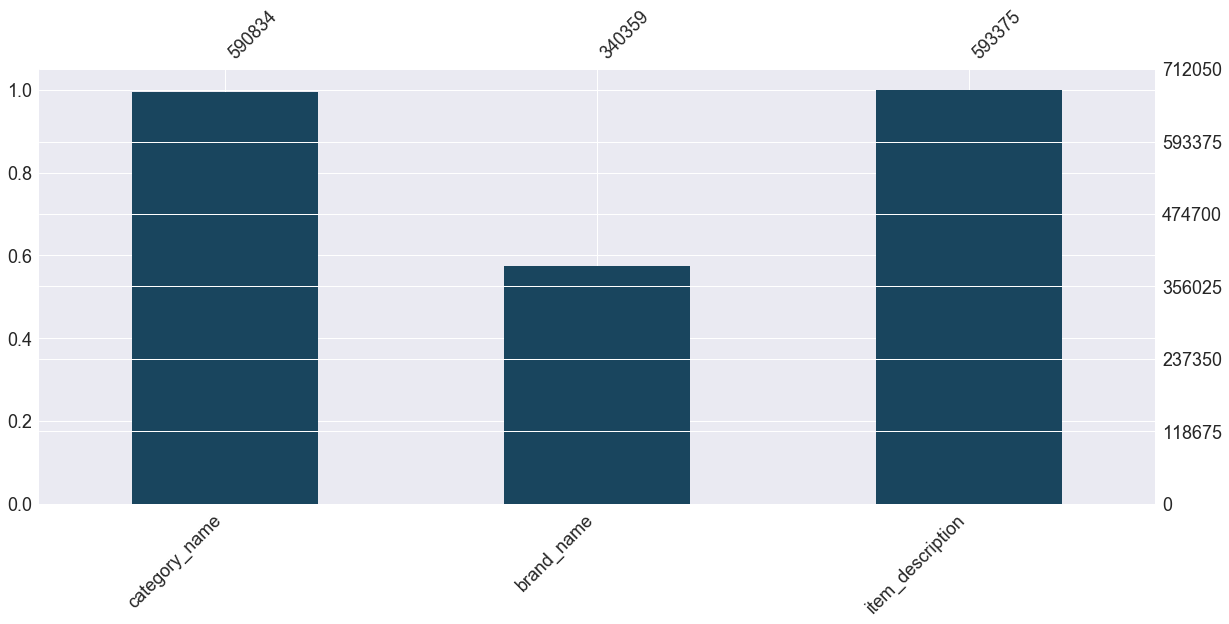

In [34]:
msno.bar(train[miss_train_col_val], figsize = (20, 8), color = "#19455e", fontsize = 18, labels = True)

#### Test Data Graph of Missing Values

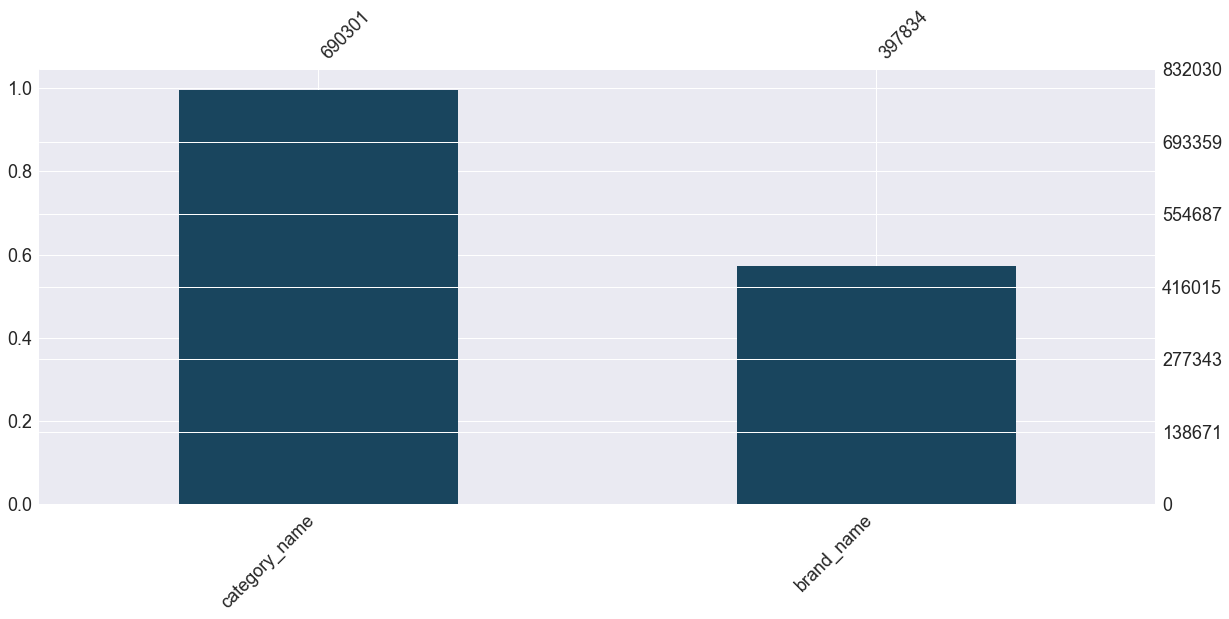

In [35]:
msno.bar(test[miss_test_col_val], figsize = (20, 8), color = "#19455e", fontsize = 18, labels = True)

In [39]:
check_n_miss_train = pd.DataFrame(miss_train_col_val)
check_n_miss_train = check_n_miss_train.rename(columns = {0: 'train'})

#### I created a DataFrame to accurately get the data I could not see in the missingno library

In [40]:
missing = []
perc_missing = []
not_missing = []
for miss in check_n_miss_train['train']:
    n_miss = len(train[miss]) - len(train[miss].dropna())
    n_notmiss = len(train[miss].dropna())
    perc_miss = n_miss / train.shape[0]
    missing.append(n_miss)
    not_missing.append(n_notmiss)
    perc_missing.append(round(perc_miss, 4) * 100)
check_n_miss_train['Not_Missing_Data'] = not_missing
check_n_miss_train['Missing_Data'] = missing
check_n_miss_train['%_Missing'] = perc_missing

In [43]:
check_n_miss_train

,train,Not_Missing_Data,Missing_Data,%_Missing
0,category_name,590834,2541,0.43
1,brand_name,340359,253016,42.64
2,item_description,593375,0,0.00


Doing the same for test data

In [44]:
check_n_miss_test = pd.DataFrame(miss_test_col_val)
check_n_miss_test = check_n_miss_test.rename(columns = {0: 'test'})

In [45]:
missing = []
perc_missing = []
not_missing = []
for miss in check_n_miss_test['test']:
    n_miss = len(test[miss]) - len(test[miss].dropna())
    n_notmiss = len(test[miss].dropna())
    perc_miss = n_miss / test.shape[0]
    missing.append(n_miss)
    not_missing.append(n_notmiss)
    perc_missing.append(round(perc_miss, 4) * 100)
check_n_miss_test['Not_Missing_Data'] = not_missing
check_n_miss_test['Missing_Data'] = missing
check_n_miss_test['%_Missing'] = perc_missing

In [46]:
check_n_miss_test

,test,Not_Missing_Data,Missing_Data,%_Missing
0,category_name,690301,3058,0.44
1,brand_name,397834,295525,42.62


# Memory Usage Analysis

In [47]:
train_columns_memory = train.memory_usage(index = True)
train_columns_memory // 1024**2

Index                4
train_id             4
name                 4
item_condition_id    4
category_name        4
brand_name           4
price                4
shipping             4
item_description     4
dtype: int64

In [48]:
train_memory = train.memory_usage(index = True).sum()
print((train_memory // 1024**2), 'MB')

40 MB


In [49]:
test_memory = test.memory_usage(index = True).sum()
print((test_memory // 1024**2), 'MB')

37 MB


In [50]:
def int_dtype_resize(df):
    int16_cols = list(df.select_dtypes(include = ['int16']).columns)
    int32_cols = list(df.select_dtypes(include = ['int32']).columns)
    int64_cols = list(df.select_dtypes(include = ['int64']).columns)
    
    for col in int16_cols:
        if ((np.max(df[col]) <= 127) and (np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        else:
            continue
            
    for col in int32_cols:
        if ((np.max(df[col]) <= 127) and (np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and (np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        else:
            continue
            
    for col in int64_cols:
        if ((np.max(df[col]) <= 127) and (np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and (np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and (np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            continue

In [51]:
# Function to resize columns' float type size: float32, float64
def float_dtype_resize(df):
    float64_cols = list(df.select_dtypes(include = ['float64']).columns)
    for col in float64_cols:
        if ((len(str(np.max(df[col])))) <= len(str(2**32))):
            df[col] = df[col].astype(np.float32)
        else:
            continue

In [52]:
int_dtype_resize(train)
float_dtype_resize(train)

C:\Users\Vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [53]:
new_train_memory = train.memory_usage(index = True).sum()
print((new_train_memory // 1024**2), 'MB')

28 MB


In [54]:
int_dtype_resize(test)
# No price column, so there is no need to use this functions since only price column is a float column

In [55]:
new_test_memory = test.memory_usage(index = True).sum()
print((new_test_memory // 1024**2), 'MB')

25 MB


In [56]:
train.dtypes

train_id               int32
name                  object
item_condition_id       int8
category_name         object
brand_name            object
price                float32
shipping                int8
item_description      object
dtype: object

# Target Price Information

In [57]:
train['price'].describe()

count    593375.000000
mean         26.689039
std          38.330841
min           0.000000
25%          10.000000
50%          17.000000
75%          29.000000
max        2000.000000
Name: price, dtype: float64

In [58]:
# MAX, MIN
max(train['price']), min(train['price'])

(2000.0, 0.0)

In [60]:
target_freq = pd.value_counts(train['price'])
target_frequency = pd.DataFrame(target_freq.sort_values()).rename(columns = {'price': 'price_frequency'})
target_frequency.sort_values(by = 'price_frequency', ascending = False)

,price_frequency
10.0,39563
12.0,32020
14.0,30776
16.0,26602
9.0,25552
8.0,24537
15.0,23074
20.0,22706
7.0,20796
18.0,16602


# Checking data frequency in each column

### Condition Frequency

In [61]:
condition_train_freq = pd.value_counts(train['item_condition_id']).sort_index()
condition_test_freq = pd.value_counts(test['item_condition_id']).sort_index()

In [62]:
condition_frequency = pd.DataFrame(condition_train_freq)
condition_frequency = condition_frequency.rename(columns = {'item_condition_id': 'condit_train_freq'})
condition_frequency['condit_test_freq'] = pd.DataFrame(condition_test_freq)
condition_frequency

,condit_train_freq,condit_test_freq
1,256121,300081
2,150564,175553
3,172980,201673
4,12737,14853
5,973,1199


### Shipping Frequency

In [63]:
shipping_train = pd.value_counts(train['shipping']).sort_index()
shipping_test = pd.value_counts(test['shipping']).sort_index()

In [64]:
shipping_frequency = pd.DataFrame(shipping_train)
shipping_frequency = shipping_frequency.rename(columns = {'shipping': 'ship_train_freq'})
shipping_frequency['ship_test_freq'] = pd.DataFrame(shipping_test)
shipping_frequency

,ship_train_freq,ship_test_freq
0,328555,382929
1,264820,310430


# Brand

### Brands Uniqueness

In [65]:
unique_brand_train = pd.DataFrame(train['brand_name'].unique())
unique_brand_train = unique_brand_train.rename(columns = {0: 'unique_brand_names'}).dropna().sort_values(by = 'unique_brand_names')
unique_brand_test = pd.DataFrame(test['brand_name'].unique())
unique_brand_test = unique_brand_test.rename(columns = {0: 'unique_brand_names'}).dropna()

### Brand Frequency

In [66]:
brand_train_freq = pd.value_counts(train['brand_name']).sort_index()
brand_test_freq = pd.value_counts(test['brand_name']).sort_index()

In [67]:
len(brand_train_freq), len(brand_test_freq)

(3751, 3900)

##### IMPORTANT: There are more brands on test data than on train data. This implies that the 2nd phase will have more brand names than the test and train data

In [68]:
brand_train_frequency = pd.DataFrame(brand_train_freq)
brand_train_frequency = brand_train_frequency.rename(columns = {'brand_name': 'brand_train_freq'})
brand_train_frequency = brand_train_frequency.sort_values(by = 'brand_train_freq', ascending = False)
brand_test_frequency = pd.DataFrame(brand_test_freq)
brand_test_frequency = brand_test_frequency.rename(columns = {'brand_name': 'brand_test_freq'})
brand_test_frequency = brand_test_frequency.sort_values(by = 'brand_test_freq', ascending = False)

In [69]:
brand_test_frequency['brand_train_freq'] = pd.DataFrame(brand_train_freq)
brand_test_frequency

,brand_test_freq,brand_train_freq
Nike,25234,21336.0
PINK,25004,21667.0
Victoria's Secret,22472,19370.0
LuLaRoe,14574,12410.0
Apple,8113,6922.0
Nintendo,7149,6112.0
FOREVER 21,7141,6007.0
Lululemon,6833,5802.0
Michael Kors,6407,5587.0
American Eagle,6164,5311.0


Missing train and test brand names

# Categories

In [70]:
category_train_freq = pd.value_counts(train['category_name']).sort_index()
category_test_freq = pd.value_counts(test['category_name']).sort_index()

In [71]:
len(category_train_freq), len(category_test_freq)

(1202, 1223)

In [72]:
category_train_freq

Beauty/Bath & Body/Bath                          2103
Beauty/Bath & Body/Bathing Accessories            131
Beauty/Bath & Body/Cleansers                      279
Beauty/Bath & Body/Other                           49
Beauty/Bath & Body/Scrubs & Body Treatments       327
Beauty/Bath & Body/Sets                           281
Beauty/Fragrance/Candles & Home Scents           1261
Beauty/Fragrance/Kids                              33
Beauty/Fragrance/Men                              842
Beauty/Fragrance/Other                             15
Beauty/Fragrance/Sets                             181
Beauty/Fragrance/Women                           7483
Beauty/Hair Care/Conditioners                     196
Beauty/Hair Care/Hair & Scalp Treatments          528
Beauty/Hair Care/Hair Color                       267
Beauty/Hair Care/Hair Loss Products                48
Beauty/Hair Care/Hair Perms & Texturizers           2
Beauty/Hair Care/Hair Relaxers                      1
Beauty/Hair Care/Other      

In [74]:
category_frequency = pd.DataFrame(category_test_freq)
category_frequency = category_frequency.rename(columns = {'category_name': 'test_frequency'})
category_frequency['train_frequency'] = pd.DataFrame(category_train_freq)

FYI: train_frequency is a float because there are NaN values in its data.

In [116]:
category_frequency.head(10)

,test_frequency,train_frequency
Beauty/Bath & Body/Bath,2285,2103.0
Beauty/Bath & Body/Bathing Accessories,142,131.0
Beauty/Bath & Body/Cleansers,362,279.0
Beauty/Bath & Body/Other,58,49.0
Beauty/Bath & Body/Scrubs & Body Treatments,365,327.0
Beauty/Bath & Body/Sets,307,281.0
Beauty/Fragrance/Candles & Home Scents,1406,1261.0
Beauty/Fragrance/Kids,70,33.0
Beauty/Fragrance/Men,993,842.0
Beauty/Fragrance/Other,17,15.0


# Splitting Category Name

In [85]:
def split_cat(text):
    try: return text.split('/')
    except: return ('NaN', 'NaN', 'NaN')

If you do not understand the usage of ' * ' in zip functions, here is a very good StackOverflow answer for you: https://stackoverflow.com/questions/9754453/in-python-what-type-of-object-does-ziplist1-list2-return

In [86]:
train['category1'], train['category2'], train['category3'] = zip(*train['category_name'].apply(lambda x: split_cat(x)))
train.head()

C:\Users\Vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category1,category2,category3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [87]:
test['category1'], test['category2'], test['category3'] = zip(*test['category_name'].apply(lambda x: split_cat(x)))
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,category1,category2,category3
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality


### Split category frequency

In [88]:
split_category1_train_freq = pd.value_counts(train['category1']).sort_index()
split_category1_test_freq = pd.value_counts(test['category1']).sort_index()
split_category2_train_freq = pd.value_counts(train['category2']).sort_index()
split_category2_test_freq = pd.value_counts(test['category2']).sort_index()
split_category3_train_freq = pd.value_counts(train['category3']).sort_index()
split_category3_test_freq = pd.value_counts(test['category3']).sort_index()

In [89]:
split_category_frequency1 = pd.DataFrame(split_category1_test_freq)
split_category_frequency1.sort_values(by = 'category1', ascending = False)

,category1
Women,310048
Beauty,97265
Kids,80225
Electronics,57679
Men,44066
Home,31966
Vintage & Collectibles,21410
Other,21409
Handmade,14335
Sports & Outdoors,11898


In [90]:
split_category_frequency2 = pd.DataFrame(split_category2_test_freq)
split_category_frequency2.sort_values(by = 'category2', ascending = False)

,category2
Athletic Apparel,62654
Makeup,58424
Tops & Blouses,50310
Shoes,46755
Jewelry,28622
Toys,27069
Cell Phones & Accessories,24976
Dresses,21490
Women's Handbags,21393
Women's Accessories,19706


In [91]:
split_category_frequency3 = pd.DataFrame(split_category3_test_freq)
split_category_frequency3.sort_values(by = 'category3', ascending = False)

,category3
"Pants, Tights, Leggings",27900
Other,23383
Face,23374
T-Shirts,21702
Shoes,14976
Lips,14595
Games,14554
Athletic,12634
Eyes,12361
"Cases, Covers & Skins",11410


# Working with STRING Columns

### Name Column

In [92]:
train_headers

['train_id',
 'name',
 'item_condition_id',
 'category_name',
 'brand_name',
 'price',
 'shipping',
 'item_description']

In [93]:
name_col_train = pd.DataFrame(train['name'])
name_col_test = pd.DataFrame(test['name'])

In [96]:
name_col_train.head(5)

,name
0,MLB Cincinnati Reds T Shirt Size XL
1,Razer BlackWidow Chroma Keyboard
2,AVA-VIV Blouse
3,Leather Horse Statues
4,24K GOLD plated rose


Finding the number of CHARACTERS in each cell

In [98]:
n_of_char_train = train['name'].str.len()
n_of_char_train[:5]

0    35
1    32
2    14
3    21
4    20
Name: name, dtype: int64

Finding the number of WORDS in each cell

In [100]:
n_of_words_train = train['name'].str.split().str.len()
n_of_words_train[:5]

0    7
1    4
2    2
3    3
4    4
Name: name, dtype: int64

In [101]:
name_col_train['char_count'], name_col_train['word_count'] = pd.DataFrame(n_of_char_train), pd.DataFrame(n_of_words_train)

In [102]:
name_col_train.head(6)

,name,char_count,word_count
0,MLB Cincinnati Reds T Shirt Size XL,35,7
1,Razer BlackWidow Chroma Keyboard,32,4
2,AVA-VIV Blouse,14,2
3,Leather Horse Statues,21,3
4,24K GOLD plated rose,20,4
5,Bundled items requested for Ruie,32,5


In [103]:
# MAX chars, MIN chars
max(name_col_train['char_count']), min(name_col_train['char_count'])

(43, 1)

In [104]:
# MAX words, MIN words
max(name_col_train['word_count']), min(name_col_train['word_count'])

(13, 1)

### Item Description Column

In [108]:
descrip_col_train = pd.DataFrame(train['item_description'])
descrip_col_train.head(6)

,item_description
0,No description yet
1,This keyboard is in great condition and works ...
2,Adorable top with a hint of lace and a key hol...
3,New with tags. Leather horses. Retail for [rm]...
4,Complete with certificate of authenticity
5,"Banana republic bottoms, Candies skirt with ma..."


Number of characters in each description

In [109]:
n_of_descrip_chars = train['item_description'].str.len()
n_of_descrip_chars[:5]

0     18
1    188
2    124
3    173
4     41
Name: item_description, dtype: int64

Number of words in each description

In [111]:
n_of_descrip_words = train['item_description'].str.split().str.len()
n_of_descrip_words[:5]

0     3
1    36
2    29
3    32
4     5
Name: item_description, dtype: int64

In [112]:
descrip_col_train['char_count'] = pd.DataFrame(n_of_descrip_chars)
descrip_col_train['word_count'] = pd.DataFrame(n_of_descrip_words)

In [113]:
descrip_col_train[:5]

,item_description,char_count,word_count
0,No description yet,18,3
1,This keyboard is in great condition and works ...,188,36
2,Adorable top with a hint of lace and a key hol...,124,29
3,New with tags. Leather horses. Retail for [rm]...,173,32
4,Complete with certificate of authenticity,41,5


In [114]:
# MAX, MIN chars
max(descrip_col_train['char_count']), min(descrip_col_train['char_count'])

(1018, 1)

In [115]:
# MAX, MIN words 
max(descrip_col_train['word_count']), min(descrip_col_train['word_count'])

(242, 1)